In [1]:
import pandas as pd

df = pd.read_csv('movie_metadata.csv')

# Missing values

In [2]:
print (df.isnull().sum())

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


# Understand reason for missing budget

In [3]:
import numpy as np
import matplotlib.pyplot as plt

df_missing_budget = df[df['budget'].isnull()]

relevant_columns = ['color','num_critic_for_reviews','duration',
                    'genres','num_voted_users','num_user_for_reviews',
                    'language','country','content_rating','gross','title_year']


   

Categorical columns

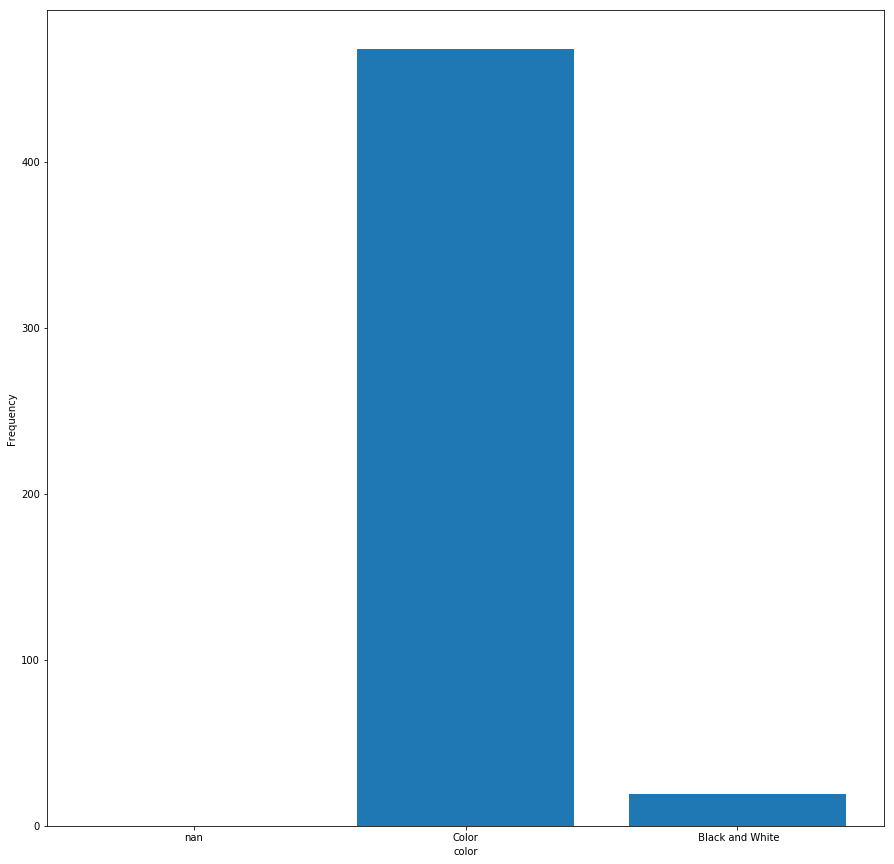

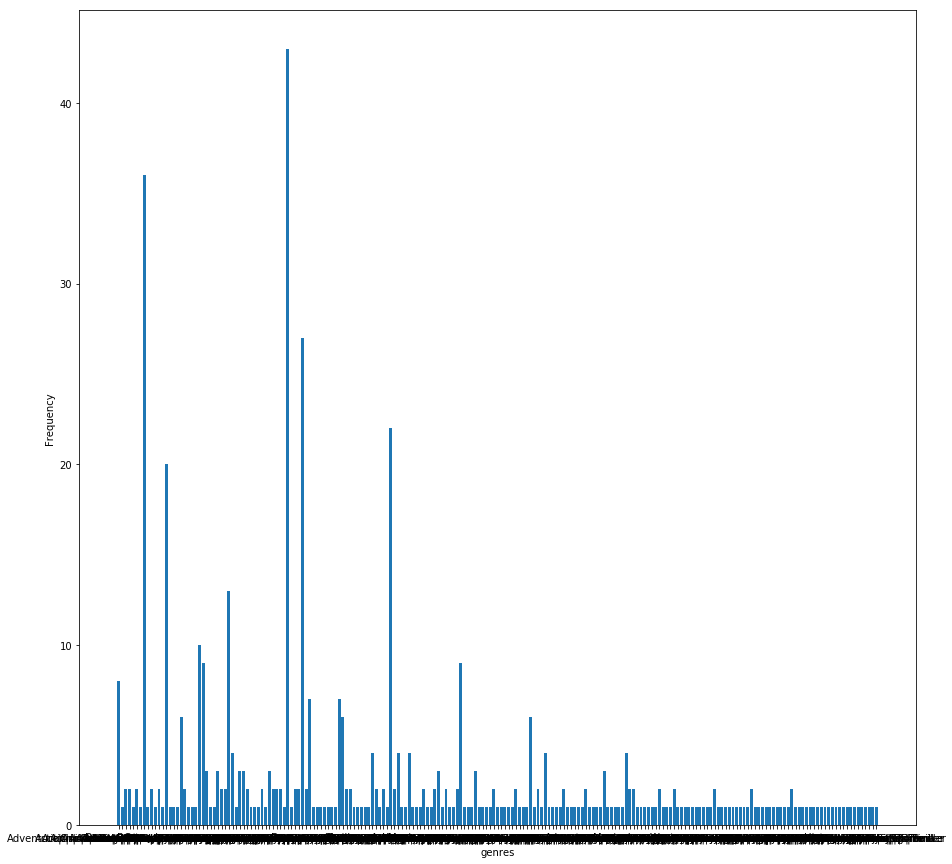

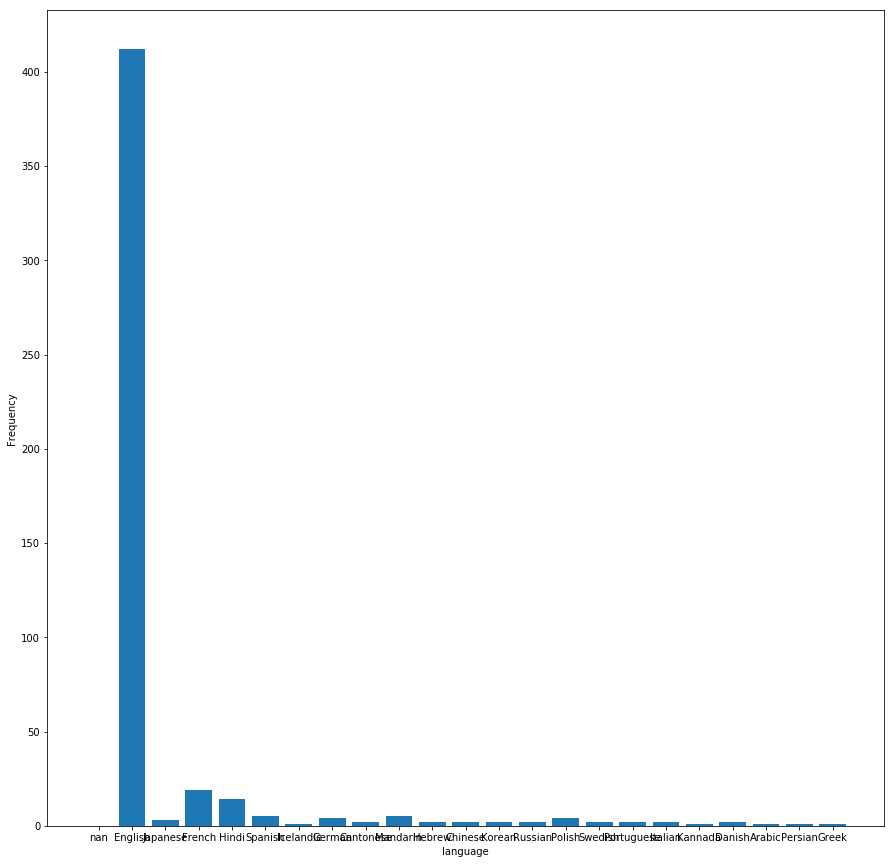

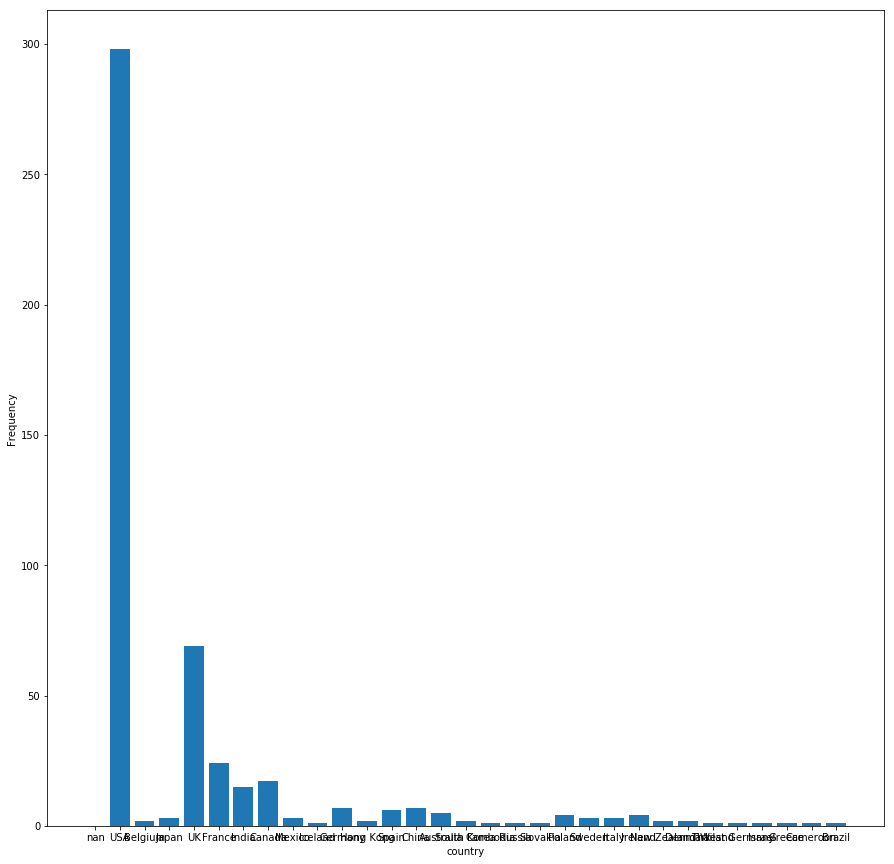

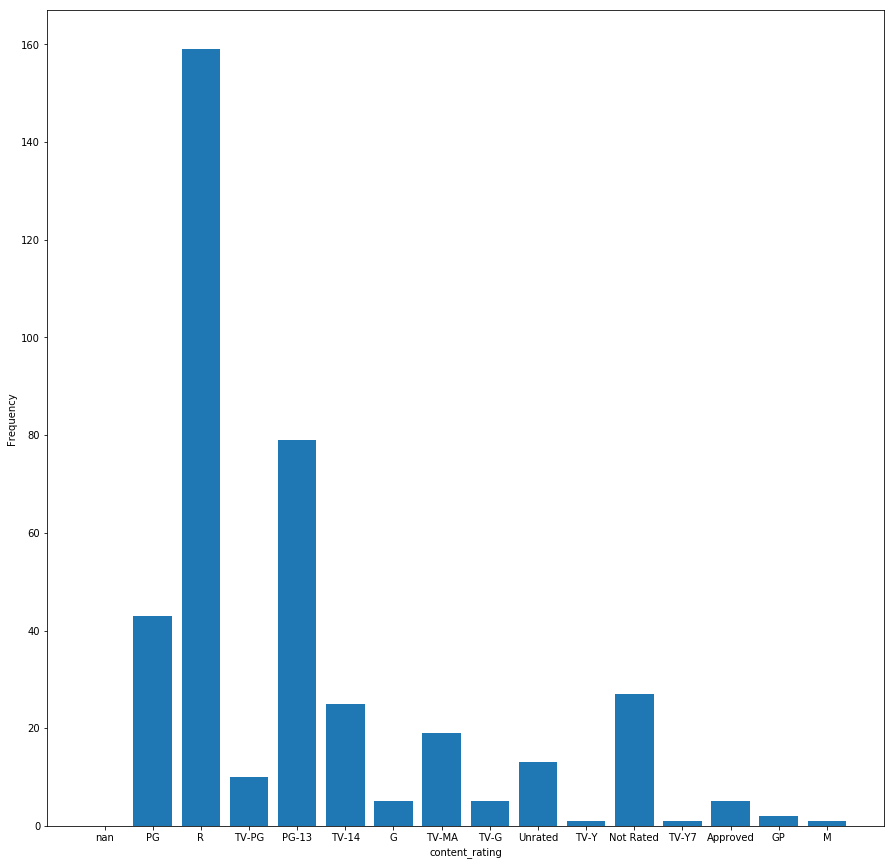

In [4]:
for column in relevant_columns:
    dtype = df_missing_budget[column].dtype
    
    #Categorical columns
    if dtype == 'object':
        column_dict ={}
        unique = pd.Series(df_missing_budget[column].fillna(np.nan).values).unique()
          
        for unique_value in unique:
            column_dict[unique_value] = df_missing_budget[df_missing_budget[column]
                                                          == unique_value][column].count()
        
        ypos = np.arange(len(column_dict.keys()))
        plt.figure(figsize=(15,15))
        plt.xticks(ypos,column_dict.keys())
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.bar(ypos,column_dict.values())
        plt.show()
        plt.close()

For categorical columns we can observe the graphs and see that it is hard to think of a reason for the missing values:

Color - Most movies are in color, it make sense that many movies with missing values for gross will be movies in color.

Genre - many different genres have missing values for gross.

Language - Most movies in data are spoken in english, it make sense that most movies with missing values for gross will be movies spoken in english. Furthermore, many other languages have missing values for gross.

Country - Most movies were filmed in USA. Similar to previous feature, data make sense.

Content Rating - The R category has the most missing values, but other categories,such as: PG, PG-13,Not Rated,etc.. has many missing values as well.

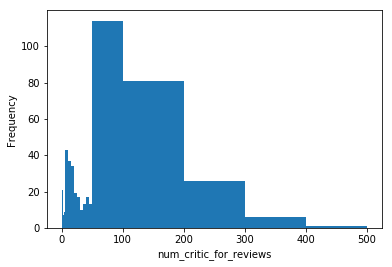

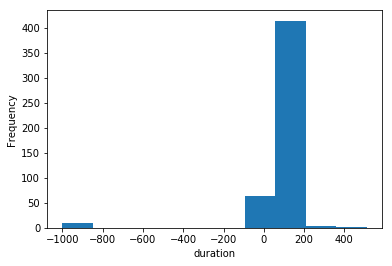

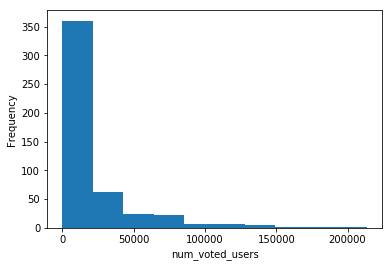

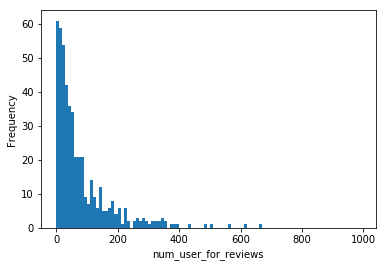

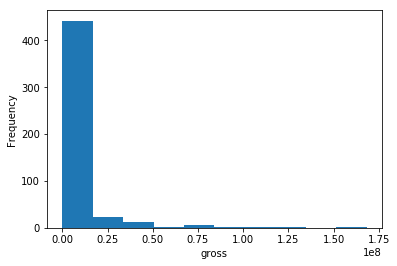

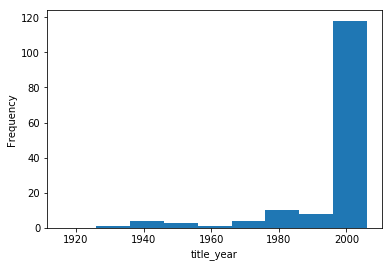

In [5]:
for column in relevant_columns:
    dtype = df_missing_budget[column].dtype   
    if dtype != 'object':
        if column=='num_critic_for_reviews':
            plt.hist(df_missing_budget[column].fillna(-1000),bins=[1,2,3,4,5,10,15,20,25,30,35,40,45,50,100,200,300,400,500])
        elif column=='budget':
            plt.hist(df_missing_budget[column].fillna(-1000),
                    bins=[10000,30000,50000,70000,90000,110000,150000,200000,300000,
                           500000,1000000,2000000,5000000,
                           10000000,20000000,30000000,40000000,50000000,
                           100000000,200000000,300000000])
        elif column=='title_year':
            plt.hist(df_missing_budget[column].fillna(-1000),
                    bins=[i for i in range(1916,2016,10)])
        elif column=='num_user_for_reviews':
            plt.hist(df_missing_budget[column].fillna(-1000),
                    bins=[i for i in range(0,1000,10)])
        else:
            plt.hist(df_missing_budget[column].fillna(-1000))
        plt.xlabel(column)
        plt.ylabel("Frequency") 
        plt.show()
        plt.close()

For numeric column:

num_critic_for_reviews - most values have less than 200 reviews, some have only less than 10 reviews. But as we can see in the plot below most movies has less than 250 reviews.

duration - most movies are longer than 90 minutes. Data don't show us additional information.

budget - most movies' budget is below 20M. We can infer from graph below that for gross data is missing might be correlated to movies with low budget.

title_year - there are ~ 100 movies from last 30 years with missing data, but most movies are from before the 90's.

In [6]:
num_missing_records_budget_with_criteria_1 = df[((df['gross'] < 20000000)
                          | (df['title_year'] > 1995))
                          & (df['budget'].isna())].shape[0]
total_missing_budget = df_missing_budget.shape[0]
percentage = float(num_missing_records_budget_with_criteria_1)/total_missing_budget*100
print ('Criteria 1 percantage: ' + str(percentage) + '%')



Criteria 1 percantage: 75.0%


In [7]:
num_missing_records_budget_with_criteria_1 = df[((df['gross'] < 20000000)
                          & (df['title_year'] > 1995))
                          & (df['budget'].isna())].shape[0]
total_missing_budget = df_missing_budget.shape[0]
percentage = float(num_missing_records_budget_with_criteria_1)/total_missing_budget*100
print ('Criteria 1 percantage: ' + str(percentage) + '%')

Criteria 1 percantage: 44.105691056910565%


In [8]:
imdb_score_average = df['imdb_score'].mean()
print('IMDB Score Average: ' + str(imdb_score_average))

imdb_score_average_only_budget = df_missing_budget['imdb_score'].mean()
print('IMDB Score Average Only Missing Budget Records: ' + str(imdb_score_average_only_budget))

IMDB Score Average: 6.442137616498111
IMDB Score Average Only Missing Budget Records: 6.617682926829277


In [9]:
from sklearn import tree
from sklearn.model_selection import train_test_split

dtc = tree.DecisionTreeClassifier(max_depth = 3)

df['missing_budget'] = np.where(df['budget'].isnull(),1,0)
X = df.drop(columns=['missing_budget','budget'])
X = pd.get_dummies(X)
X = X.fillna(0)
y = df['missing_budget']

clf = dtc.fit(X,y)


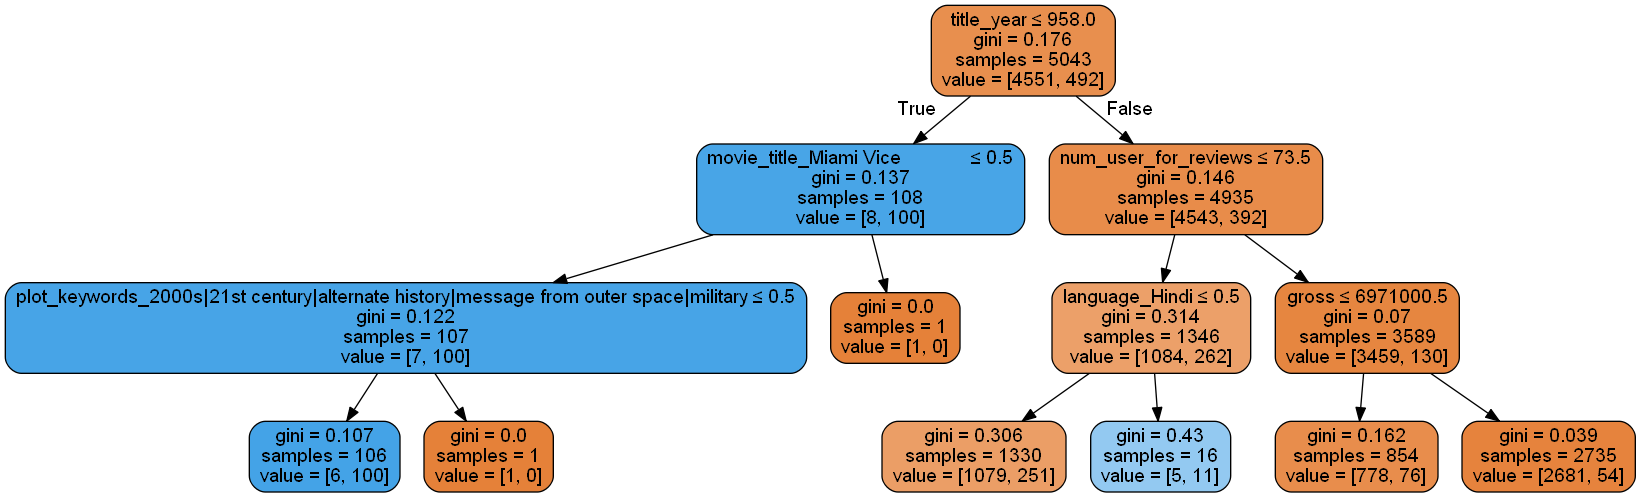

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus 

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,feature_names=X.columns,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

count    5.043000e+03
mean     3.587421e+07
std      1.961555e+08
min     -1.100000e+03
25%      3.000000e+06
50%      1.500000e+07
75%      4.000000e+07
max      1.221550e+10
Name: budget, dtype: float64
15000000.0


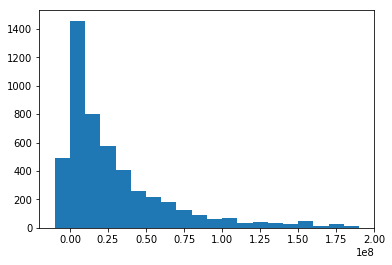

In [20]:
plt.hist(df['budget'].fillna(-1100),
                    bins=[i for i in range(-10000000,200000000,10000000)])
print(df['budget'].fillna(-1100).describe())


# Budget imputation

In [12]:
from sklearn.model_selection import train_test_split

relevant_columns = ['budget','color','num_critic_for_reviews','duration',
                    'genres','num_voted_users','num_user_for_reviews',
                    'language','country','content_rating','gross','title_year']

df_with_budget = df[df['budget'].notnull()][relevant_columns]

categorical_title_year_df = pd.DataFrame(df['title_year'].fillna(0),dtype='category',index=df_with_budget.index) 

df_with_budget = df_with_budget.drop(columns=['title_year'],axis=1)
df_with_budget = pd.concat([df_with_budget,categorical_title_year_df],axis=1)

X = df_with_budget.drop(columns=['budget'],axis=1)
X = pd.get_dummies(X)
X = X.fillna(0)
y = df_with_budget['budget']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from math import sqrt

reg = LassoCV(cv=5, random_state=0,max_iter=5000)

clf = reg.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)
#33,012,878

33012878.681943517


In [14]:
from sklearn.ensemble import RandomForestRegressor

dtc_1 = RandomForestRegressor(n_estimators=400, max_depth = 100)
clf = dtc_1.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)
#n_estimators=400, max_depth = 100: rmse = 25,845,490

25936521.91978359


In [15]:
"""y_pred = clf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)"""

'y_pred = clf.predict(X_test)\nrmse = sqrt(mean_squared_error(y_test, y_pred))\nprint(rmse)'